## Notebook for characterization of potential p14 gene panel

In [1]:
import numpy as np
import pandas as pd
import anndata as ad
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import NearestCentroid
import json

In [2]:
# Load data
devData = sc.read("../Data/devData.h5ad")

# Load most up to date cluster codes
clCodes = pd.read_feather("../Data/cluster_results.feather")
clCodes = clCodes.rename(columns={'id': 'sample_id', 'clusterData.cl.result.cl': 'cl'})
clCodes.set_index('sample_id',inplace=True)

# Combine cluster code w/ AnnData object
devData.obs = devData.obs.merge(clCodes,how='inner',left_index=True,right_index=True,validate = "1:1")

C:\Users\mathew.summers\Anaconda3\envs\scanpy1.9\lib\site-packages\anndata\_core\anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [3]:
# Load panel
with open("../Results/Gene Panels/p14_Neuronal_PROPOSE_panel.json", 'r') as f:
    p14Panel = json.load(f)
    
with open("../Results/Gene Panels/activeSVM_ZI_panel.json", 'r') as f:
    ziPanel = json.load(f)
    
addDF = pd.read_csv('../Results/Gene Panels/Gene Panel Add-ons.csv')
addPanel = list(addDF["Genes"])

## Gene overlap
Look at total number of genes across panels, need to wrangle the number to 500. activeSVM genes are a "ranked list", and add ons have some varying degree of priority

In [25]:
addPanel

['Calb2',
 'Scn4b',
 'Gad1',
 'Prkcd',
 'Necab2',
 'Neurog2',
 'Olig3',
 'Dbx1',
 'Ascl1',
 'Nkx2-2',
 'Irx3',
 'Pax6',
 'Gbx2',
 'Mki67',
 'Tac2',
 'Chrnb4',
 'Sox1',
 'Pou4f1',
 'Sox14',
 'Meis2',
 'Isl1',
 'Pvalb',
 'Gata3',
 'Tal1',
 'Dlx6',
 'Dlx6os1',
 'Rprml',
 'Zim1',
 'Galr1',
 'Bhlhe22',
 'Fzd5',
 'Ctxn3',
 'Rxfp1',
 'Grin2c',
 'Prkcd',
 'Col27a1',
 'Mctp2',
 'Aqp4',
 'Gfap',
 'Emrn',
 'Apod',
 'Pdgfra',
 'Cspg4',
 'Aif1',
 'Cx3cr1',
 'Dlx5',
 'Th',
 'Alk',
 'Serpine2',
 'C1ql3',
 'Car8',
 'Nmbr',
 'Cbln1',
 'Cbln2',
 'Chat',
 'Lmo3',
 'Col15a1',
 'Ctxn3',
 'Tpbg',
 'Six3',
 'Necab1',
 'Pdlim3',
 'Pou3f3',
 'Pou6f2',
 'Scube1',
 'Tspan9',
 'Tsh22',
 'Vipr2',
 'Wnt2',
 'Slc17a6',
 'Slc32a1',
 'Slc17a8',
 'Kcnq5',
 'Stxbp5l',
 'Sparc',
 'Cnih2',
 'Thsd7b',
 'Wnt4',
 'Cbln1',
 'Fstl5',
 'Ctxn3',
 'Slc32a1',
 'Fabp3',
 'Slc32a1',
 'Cacna2d1',
 'Slc17a6',
 'Nfib',
 'Adarb2',
 'Pcsk5',
 'Col12a1',
 'Cntnap5b',
 'Gabrg3',
 'Pou4f1        ',
 'D130079A08Rik',
 'Gng8       ',
 'Hcn1',

In [24]:
print('PROPOSE Panel Length:',len(p14Panel['346']))
print('PROPOSE + All AddOns Length:',len(set(p14Panel['346'] + addPanel)))
print('PROPOSE + ZI Panel + All AddOns Length:',len(set(p14Panel['346'] + ziPanel['60'] + addPanel)))

PROPOSE Panel Length: 346
PROPOSE + All AddOns Length: 469
PROPOSE + ZI Panel + All AddOns Length: 519


## Per gene expression
Try to assess the total transcripts per cell for the proposed gene panel, and compare that to the adult panel.

There are some fundamental flaws w/ the analysis as it stands, perhaps due to previous normalization steps. Should probably do something w/ UMIs

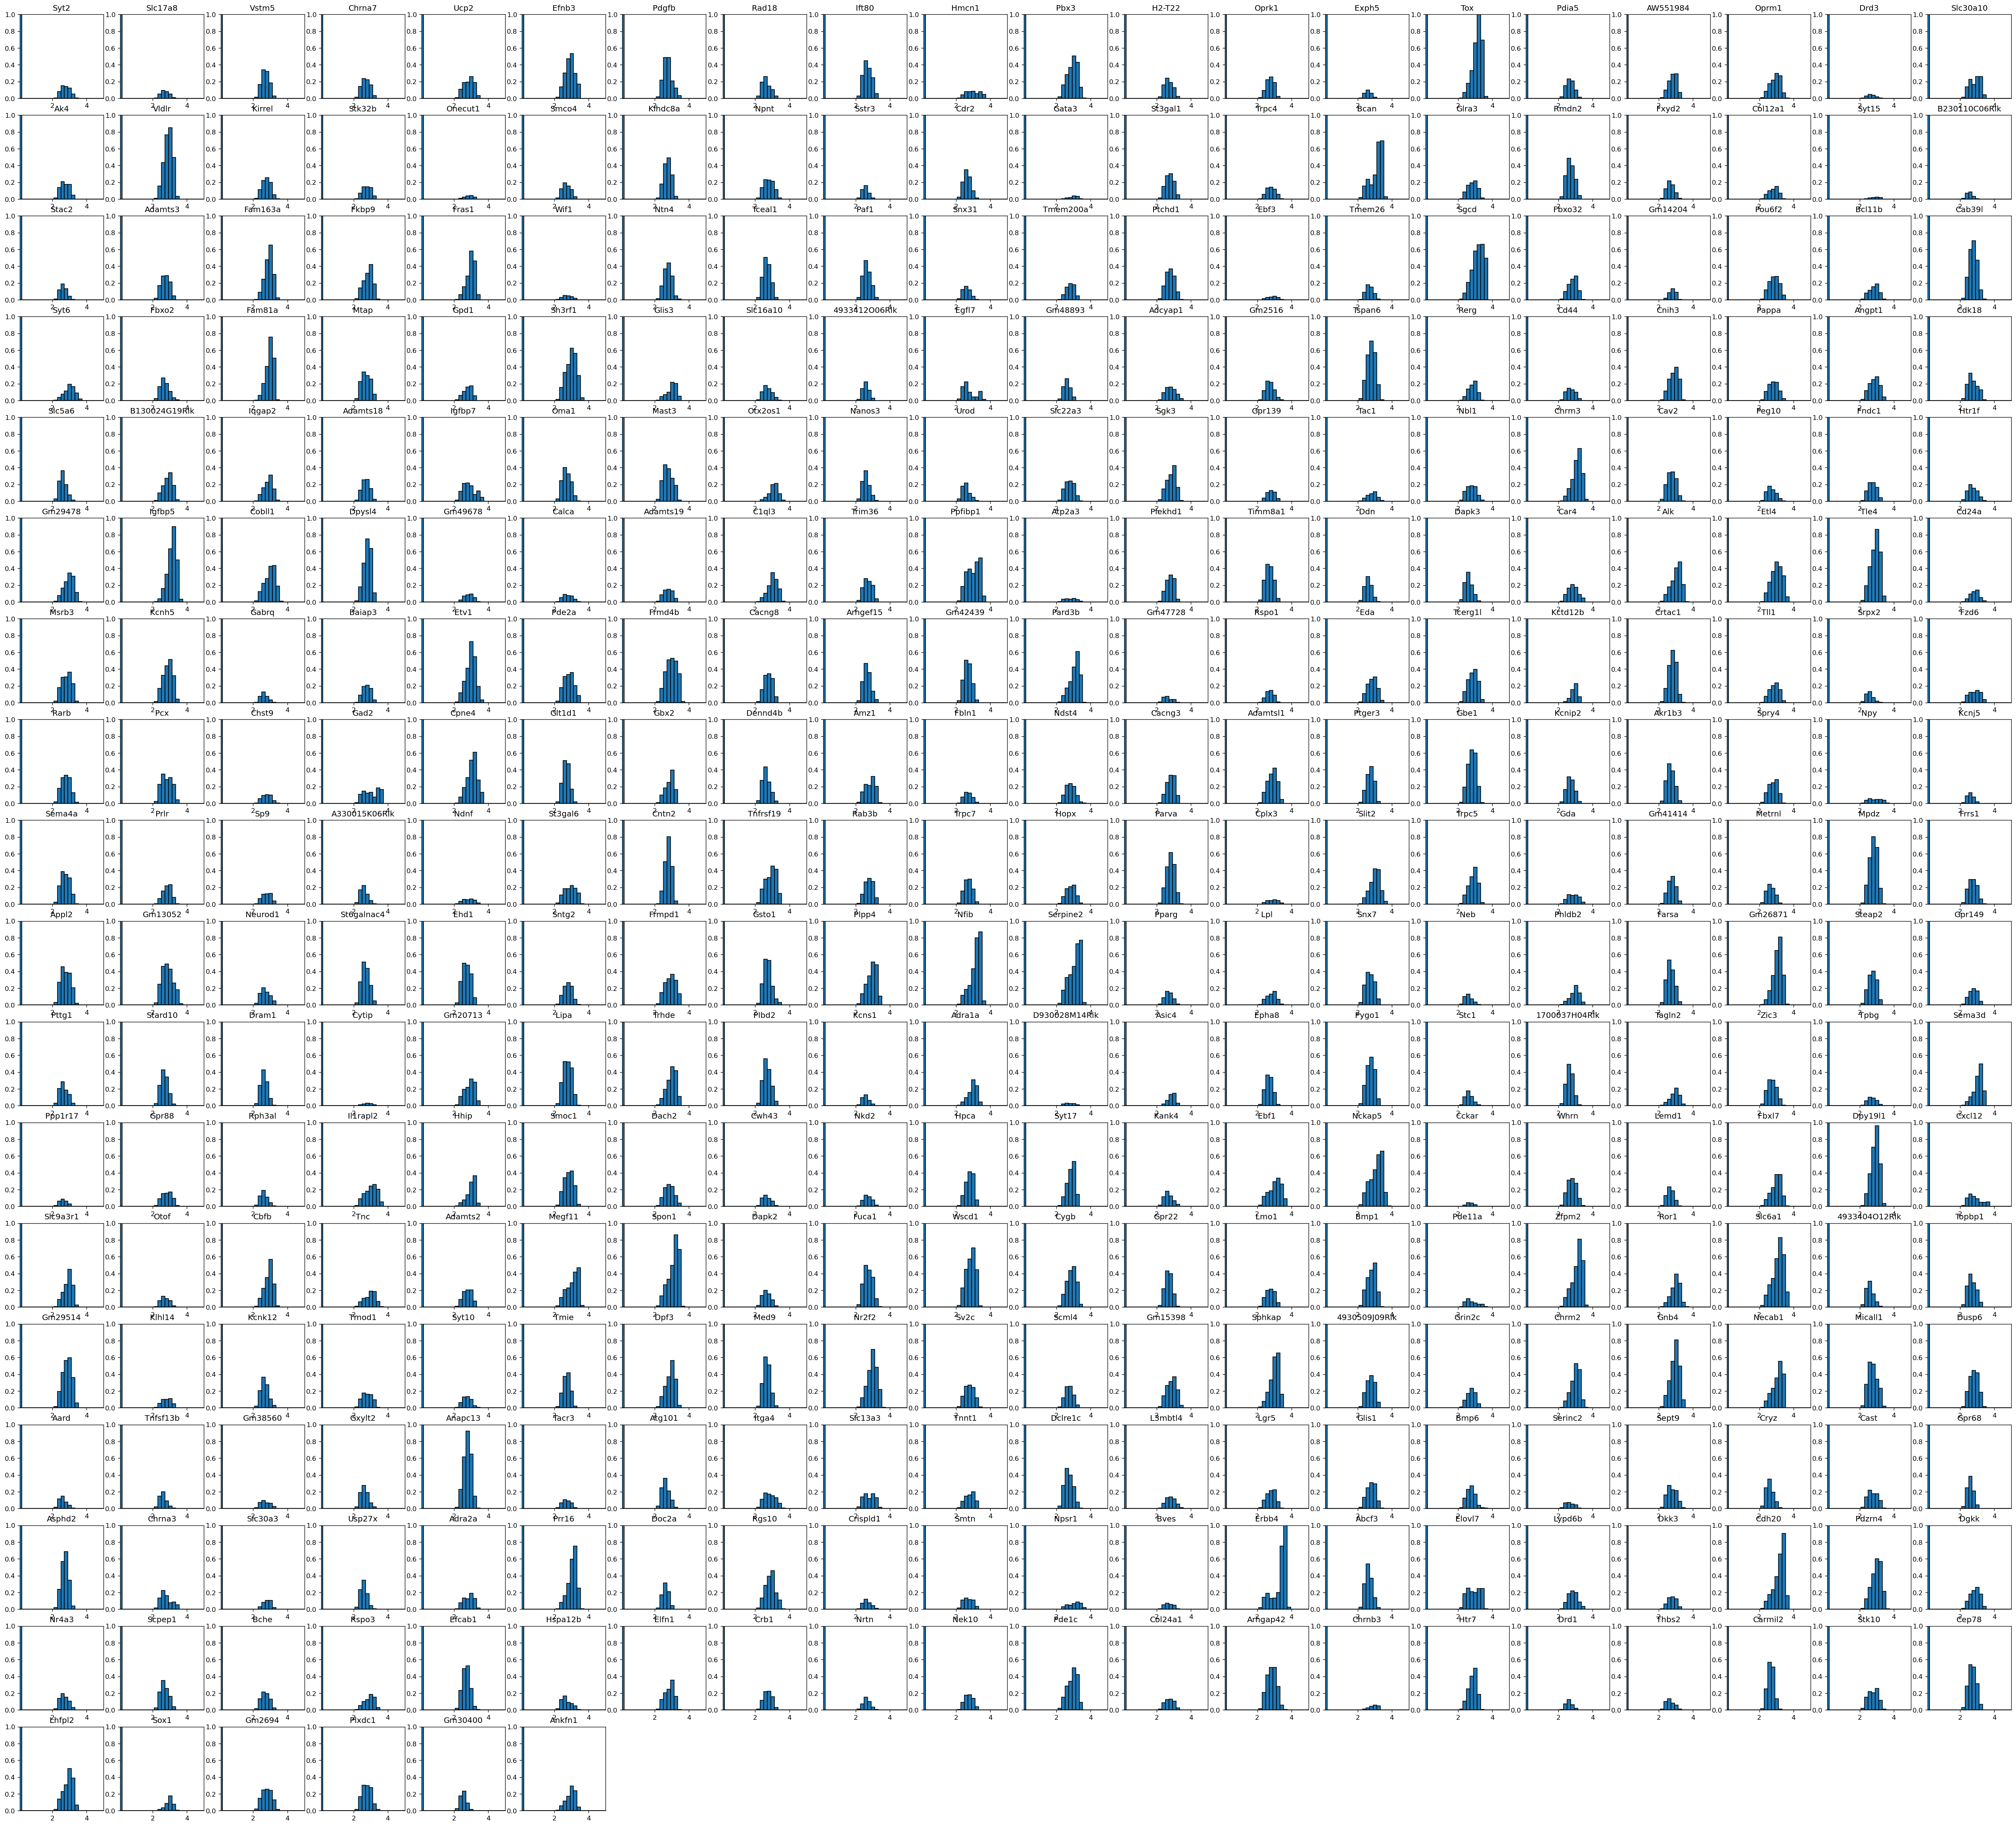

In [6]:
# Plot log2 expression histograms for gene panel genes
geneList = range(346)
bins = np.linspace(0,5,25)

nGenes = len(geneList)
nRows = int(np.sqrt(nGenes))
nCols = int(np.ceil(nGenes / nRows))

plt.figure(figsize=(nRows * 3, nCols * 2.5), dpi=120)
plt.subplot(nRows,nCols ,1)

# Plot histograms
for i, gene in enumerate(geneList):
    plt.subplot(nRows,nCols,i+1)
    plt.hist(devData[:,p14Panel["346"][gene]].X.A, bins, density=True,edgecolor='black',linewidth=1);
    plt.title(p14Panel["346"][gene])
    plt.xlim(0.1,5)
    plt.ylim(0,1)

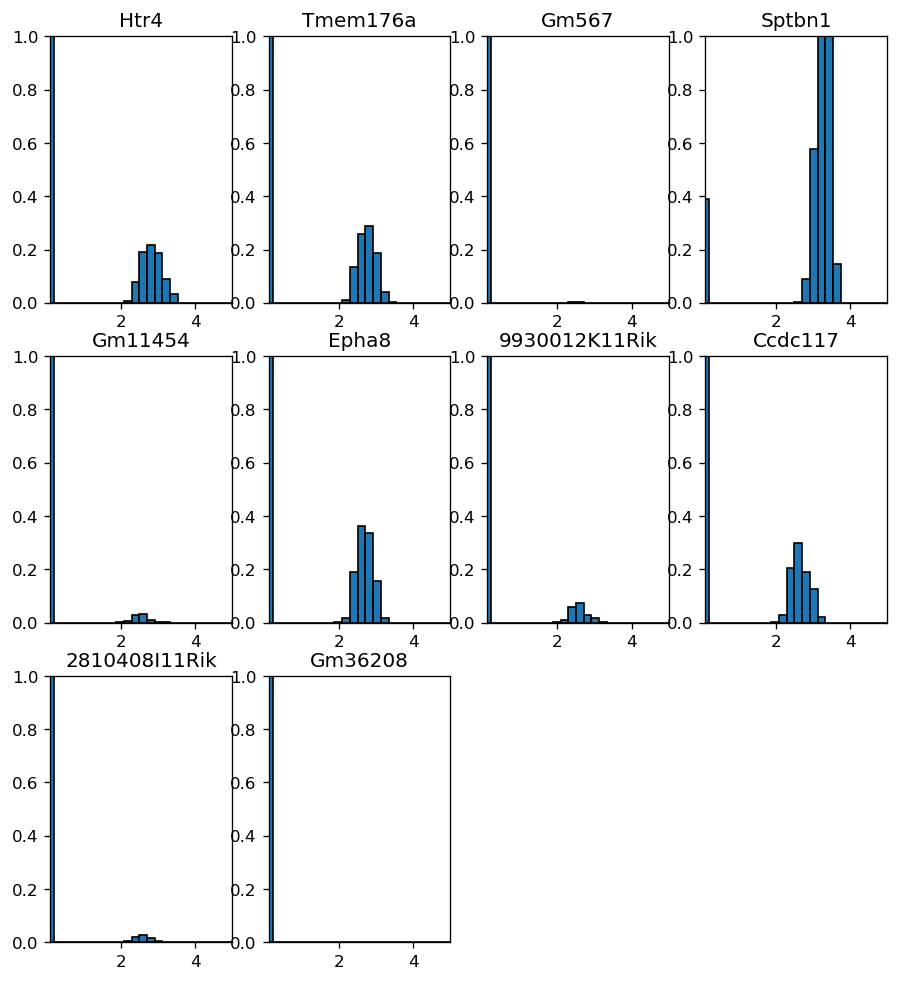

In [26]:
# Plot log2 expression histograms for randomly selected genes
from random import sample

allGenes = list(devData.var_names)
geneList = sample(allGenes,10)

bins = np.linspace(0,5,25)

nGenes = len(geneList)
nRows = int(np.sqrt(nGenes))
nCols = int(np.ceil(nGenes / nRows))

plt.figure(figsize=(nRows * 3, nCols * 2.5), dpi=120)
plt.subplot(nRows,nCols ,1)

# Plot histograms
for i, gene in enumerate(geneList):
    plt.subplot(nRows,nCols,i+1)
    plt.hist(devData[:,gene].X.A, bins, density=True,edgecolor='black',linewidth=1);
    plt.title(gene)
    plt.xlim(0.1,5)
    plt.ylim(0,1)

## Total counts per cell

In [5]:
# Load adult data
adultData = sc.read("../../Thalamus scRNAseq/Data/thData.h5ad")

# Load MERSCOPE panel
with open("../../Thalamus scRNAseq/Results/Gene Panels/MERSCOPE_cluster_genes.json", 'r') as f:
    adultPanel = json.load(f)

C:\Users\mathew.summers\Anaconda3\envs\scanpy1.9\lib\site-packages\anndata\_core\anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [6]:
# Clean inputs such that each panel is compatible with each data set
rmGenes = set(p14Panel['346'] + ziPanel['60'] + addPanel) - set(devData.var_names)
devDataDevPanelGenes = list(set(p14Panel['346'] + ziPanel['60'] + addPanel) - rmGenes)

rmGenes = set(adultPanel['500']) - set(devData.var_names)
devDataAdultPanelGenes = list(set(adultPanel['500']) - rmGenes)

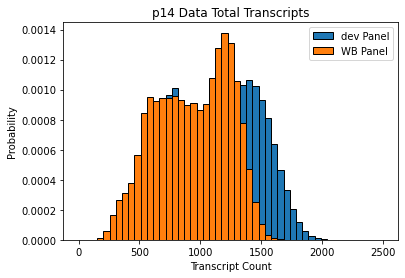

In [20]:
# Plot cell-wise total expression count for all genes in panel
# Convert from lognormalized units to transcript counts
# x = devData[:,p14Panel['346']].X.A
x = devData[:,devDataDevPanelGenes].X.A
x[x == 0] = np.nan
y = 2 ** x
y[np.isnan(y)] = 0
devDataDevPanel = np.sum(y,1)

x = devData[:,devDataAdultPanelGenes].X.A
x[x == 0] = np.nan
y = 2 ** x
y[np.isnan(y)] = 0
devDataAdultPanel = np.sum(y,1)

bins = np.linspace(0,2500,50)

plt.hist(devDataDevPanel, bins, density = True,edgecolor = 'black', linewidth = 1,label='dev Panel');
plt.hist(devDataAdultPanel, bins, density = True,edgecolor = 'black', linewidth = 1,label='WB Panel');
plt.xlabel('Transcript Count')
plt.ylabel('Probability')
plt.title('p14 Data Total Transcripts')
plt.legend()

In [32]:
# Clean inputs such that each panel is compatible with each data set
rmGenes = set(p14Panel['346'] + ziPanel['60'] + addPanel) - set(adultData.var_names)
adultDataDevPanelGenes = list(set(p14Panel['346'] + ziPanel['60'] + addPanel) - rmGenes)

In [33]:
# Get per cell expression counts for adult MERSCOPE panel
x = adultData[:,adultPanel['500']].X.A
x[x == 0] = np.nan
y = 2 ** x
y[np.isnan(y)] = 0
adultDataAdultPanel = np.sum(y,1)

# Get per cell expression counts for adult MERSCOPE panel
x = adultData[:,adultDataDevPanelGenes].X.A
x[x == 0] = np.nan
y = 2 ** x
y[np.isnan(y)] = 0
adultDataDevPanel = np.sum(y,1)

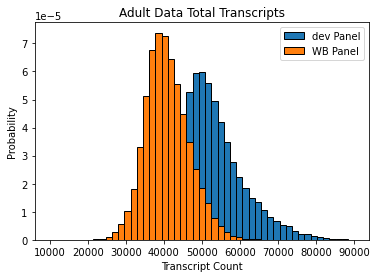

In [36]:
# Plot cell-wise total expression count for all genes in panel
bins = np.linspace(10000,90000,50)
plt.hist(adultDataDevPanel, bins, density = True,edgecolor = 'black', linewidth = 1,label='dev Panel');
plt.hist(adultDataAdultPanel, bins, density = True,edgecolor = 'black', linewidth = 1,label='WB Panel');
plt.xlabel('Transcript Count')
plt.ylabel('Probability')
plt.title('Adult Data Total Transcripts')
plt.legend()

## Look at noncoding genes
Some concern about Havana project genes - make sure they look ok

In [9]:
# Look for genes starting w/ "gm"
import re
p  = re.compile('Gm', re.IGNORECASE)
geneList = p14Panel["346"]#devData.var_names
gmGenes = list(filter(p.search, geneList))
gmGenes

['Gm14204',
 'Gm48893',
 'Gm2516',
 'Gm29478',
 'Gm49678',
 'Gm42439',
 'Gm47728',
 'Gm41414',
 'Gm13052',
 'Gm26871',
 'Gm20713',
 'Gm29514',
 'Gm15398',
 'Gm38560',
 'Gm2694',
 'Gm30400']

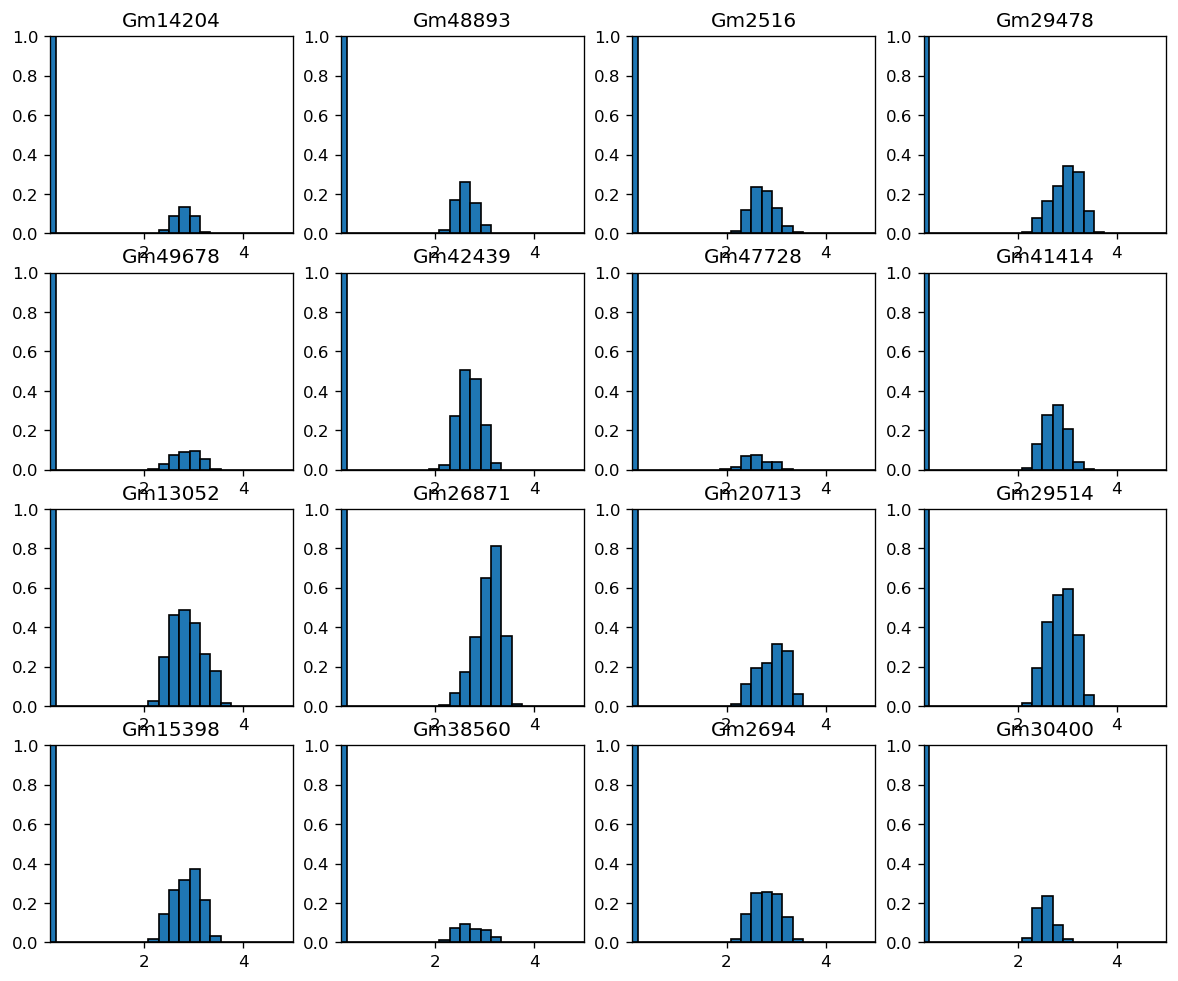

In [11]:
# Plot log2 expression histograms for gene panel genes
bins = np.linspace(0,5,25)

nGenes = len(gmGenes)
nRows = int(np.sqrt(nGenes))
nCols = int(np.ceil(nGenes / nRows))

plt.figure(figsize=(nRows * 3, nCols * 2.5), dpi=120)
plt.subplot(nRows,nCols ,1)

# Plot histograms
for i, gene in enumerate(gmGenes):
    plt.subplot(nRows,nCols,i+1)
    plt.hist(devData[:,gene].X.A, bins, density=True,edgecolor='black',linewidth=1);
    plt.title(gene)
    plt.xlim(0.1,5)
    plt.ylim(0,1)

In [10]:
def evalPanel(geneData,genePanel,cluster, showPlot = True):
    """ Function to evaluate the accuracy of a gene panel and plot confusion matrices if requested"""
    from sklearn.neighbors import NearestCentroid
    from scanpy.metrics import confusion_matrix
    import seaborn as sns
    
    # Project data onto input gene panel, then establish a nearest centroid classifier
    projGenes = geneData[:,genePanel].X
    nn = NearestCentroid()
    nn.fit(projGenes,cluster)
    assignedCluster = nn.predict(projGenes)
    accuracy = nn.score(projGenes,cluster)
    # Plot confusion matrix if requested
    if showPlot:
        plt.figure(figsize=(48, 32), dpi=80)
        confMatrix = confusion_matrix(cluster.to_numpy(),assignedCluster)
        ax = sns.heatmap(confMatrix, cmap = "magma_r")
        
        # Format heatmap
        nClusters = len(pd.unique(cluster))
        plt.xticks(np.linspace(0.5,nClusters - .5,nClusters), pd.unique(cluster), fontsize = 8)
        plt.yticks(np.linspace(0.5,nClusters - .5,nClusters), pd.unique(cluster), fontsize = 8)
        plt.title("Classification Accuracy: %1.1f%%" %round(accuracy*100,2),fontsize=36)
        plt.xlabel("Original Label", fontsize = 24)
        plt.ylabel("Assigned Label", fontsize = 24)
        return accuracy, ax, confMatrix
    else:
        return accuracy

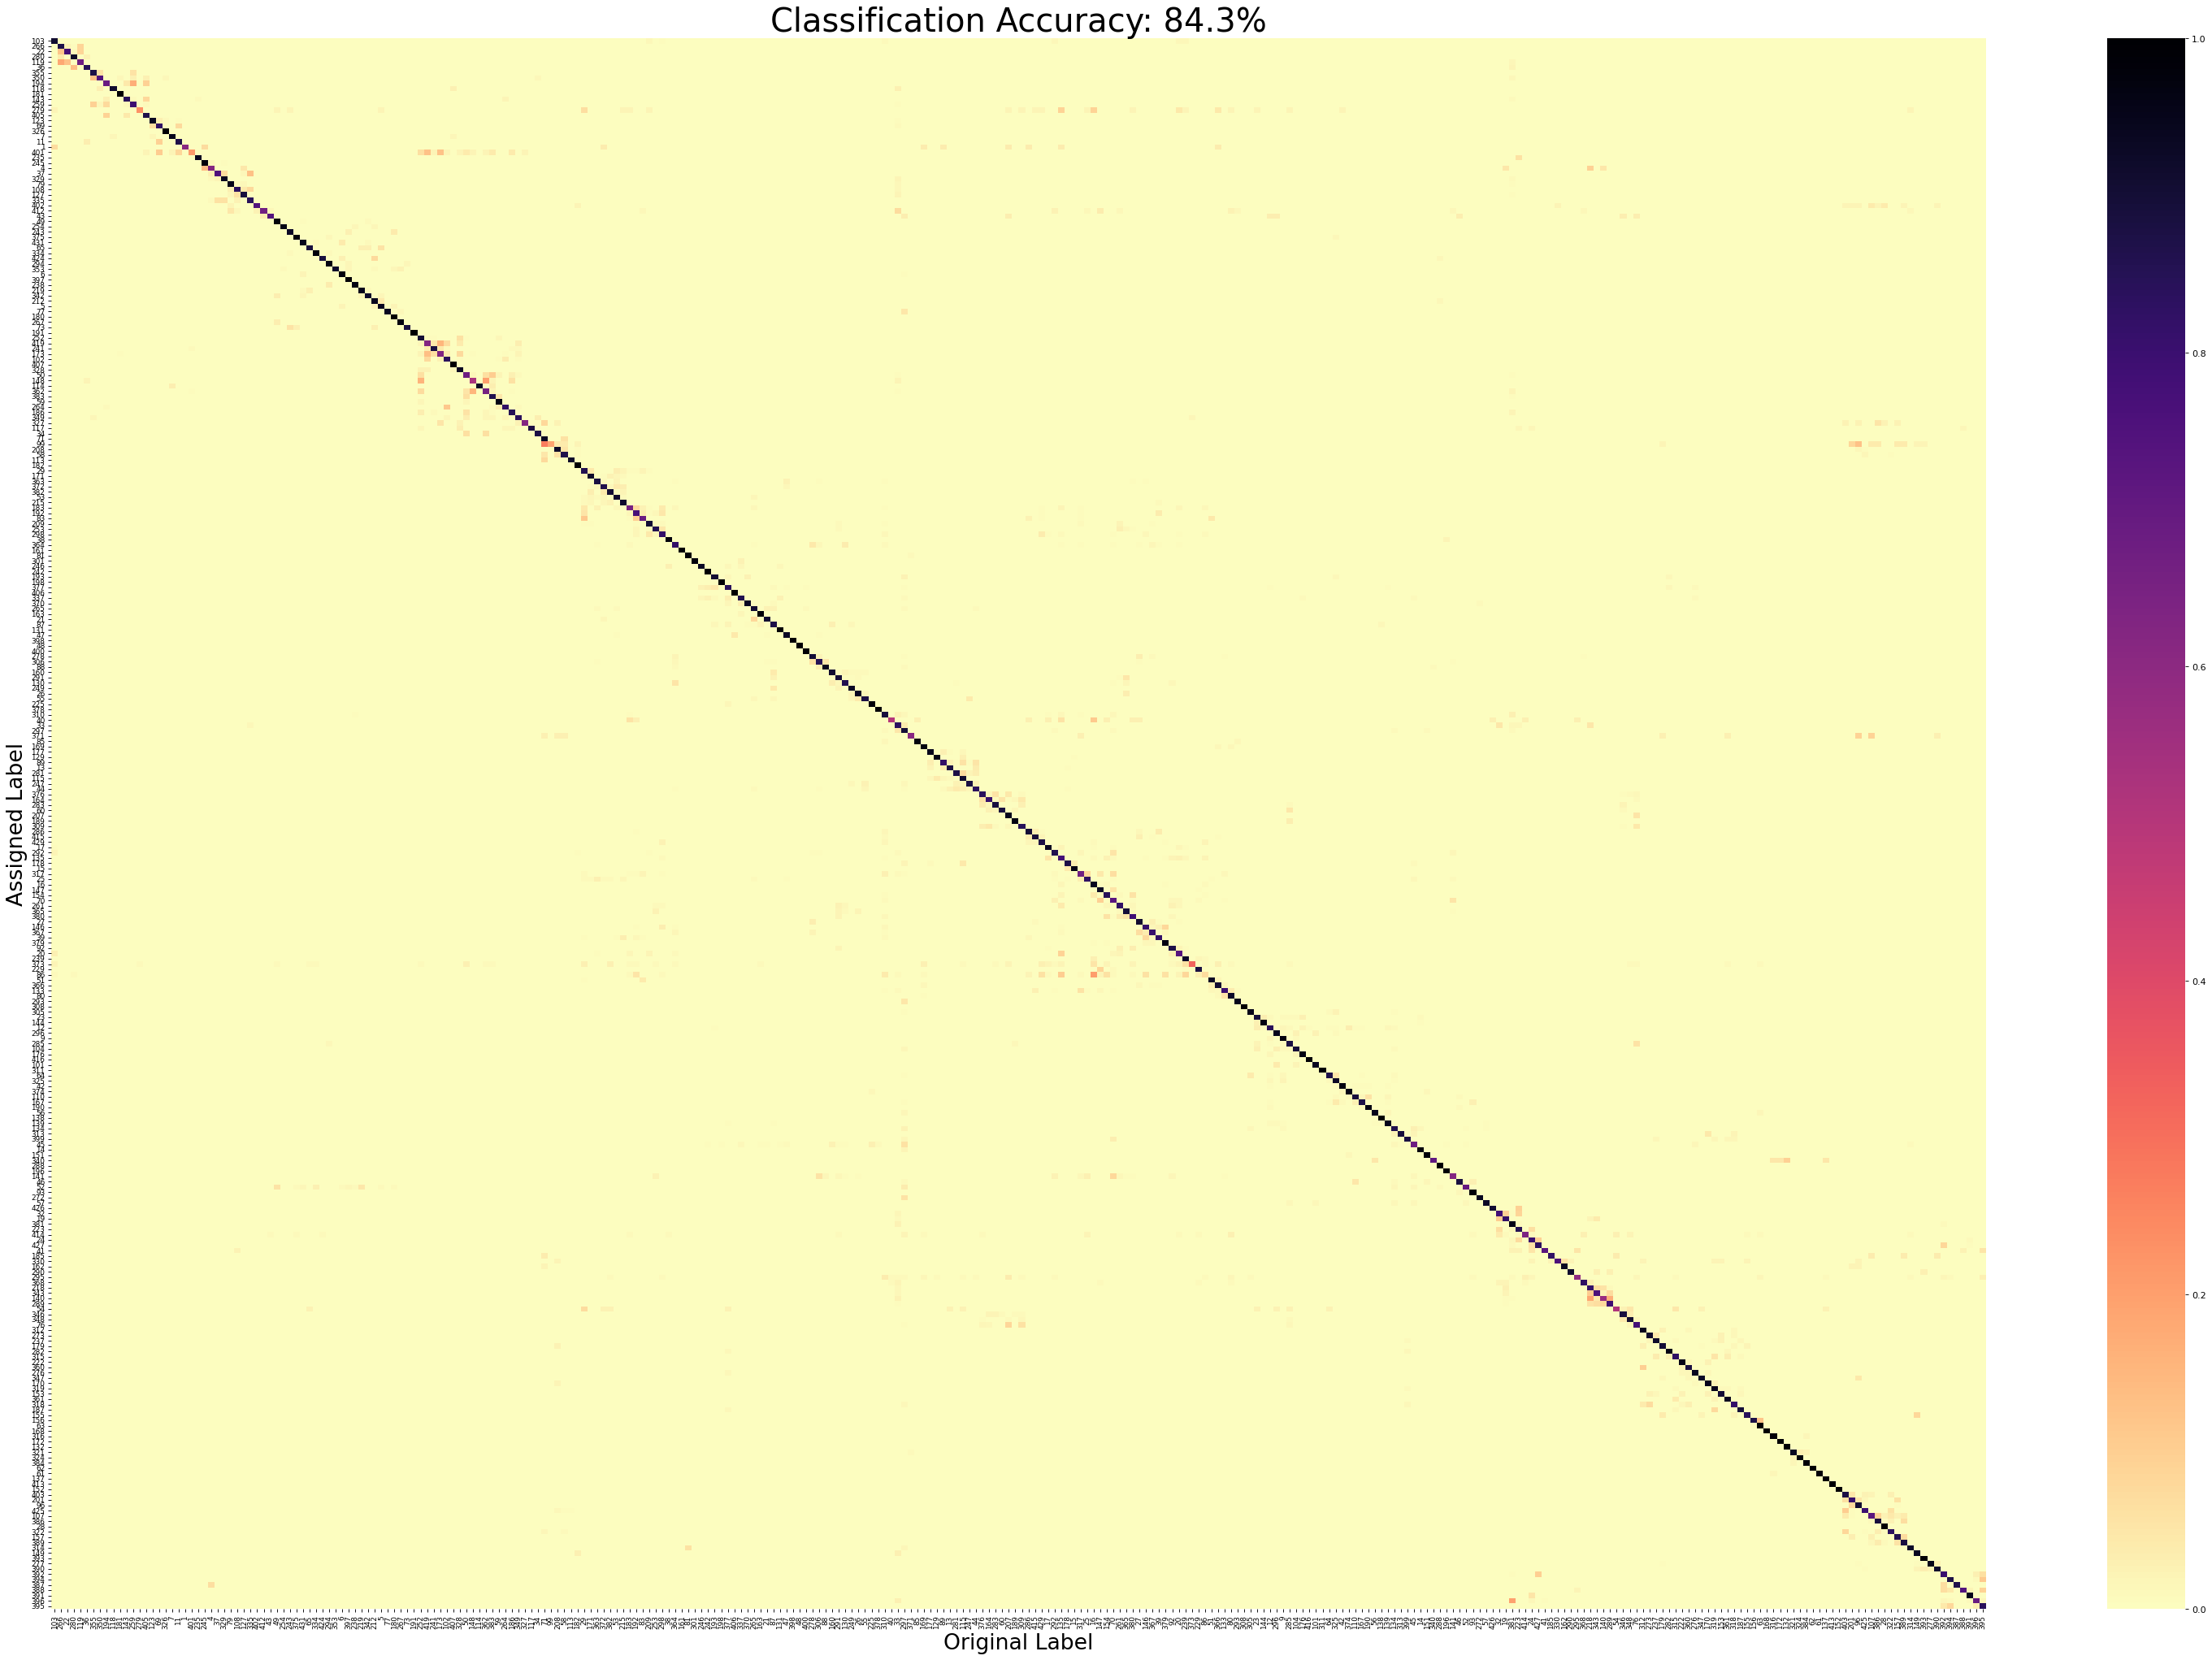

In [18]:
evalPanel(devData,p14Panel["346"],devData.obs["cl"]);

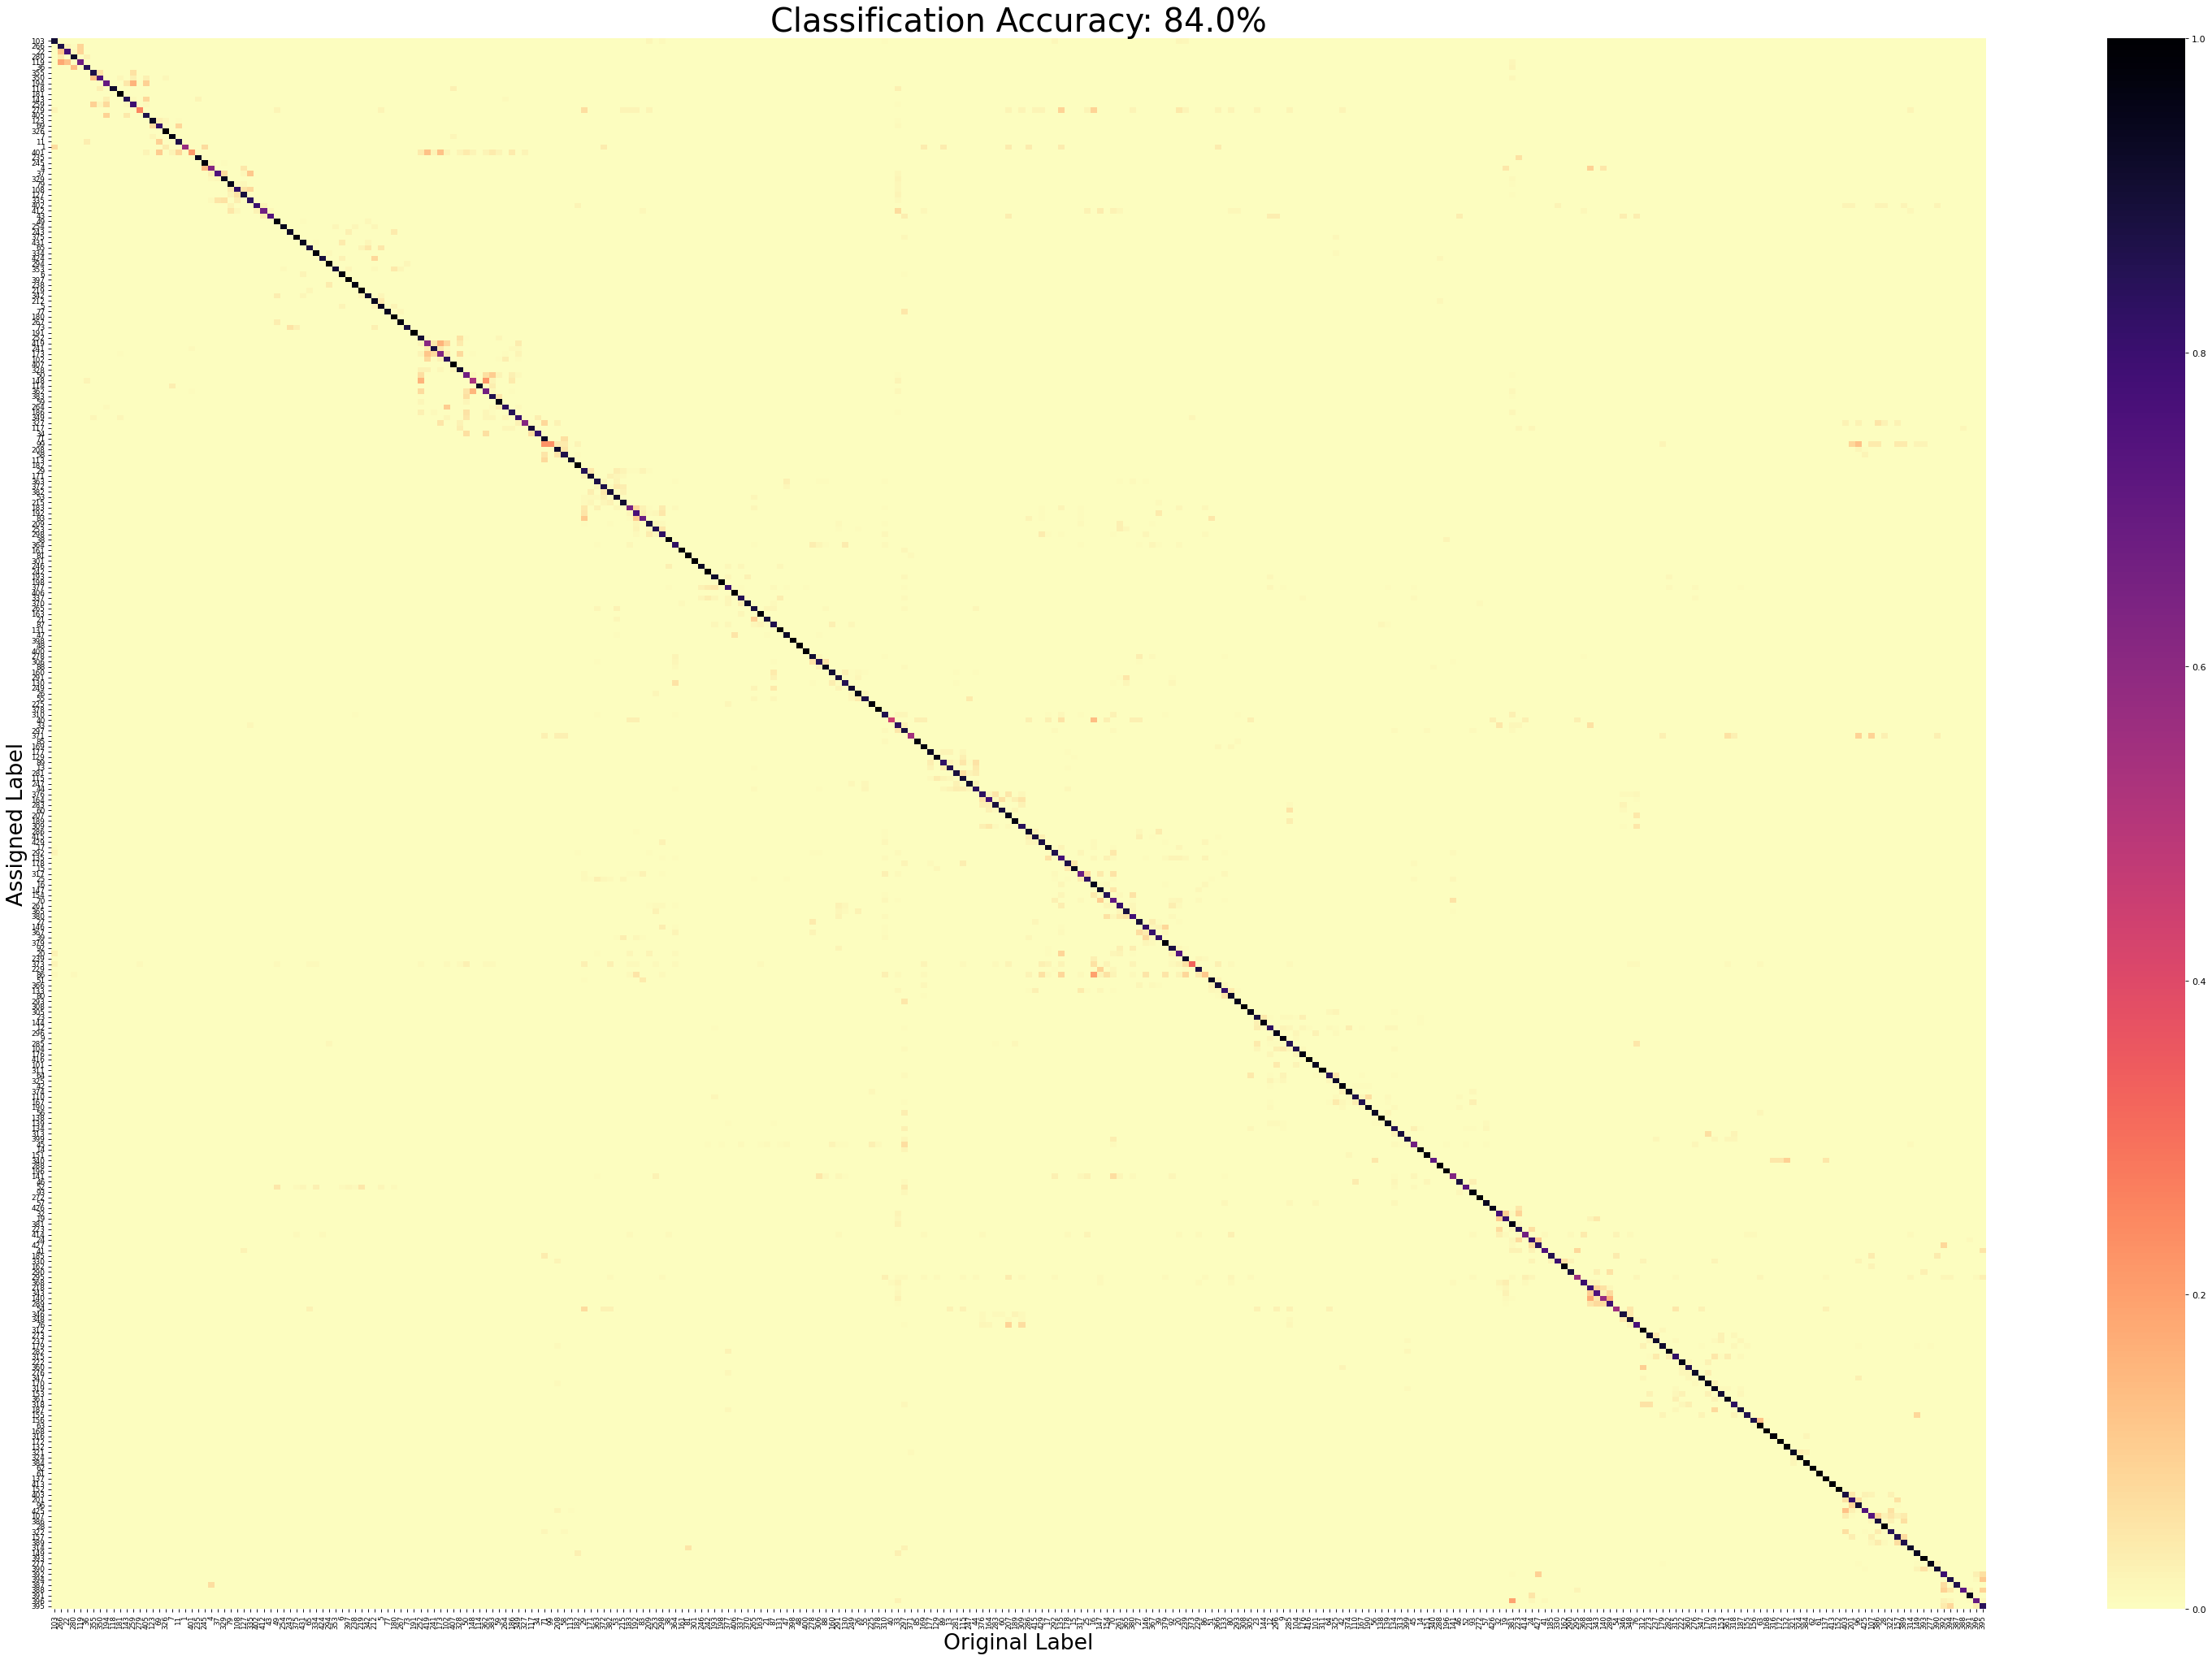

In [19]:
gmFreePanel = list(set(p14Panel["346"]) - set(gmGenes))
evalPanel(devData,gmFreePanel,devData.obs["cl"]);

## Remove highly expressed genes
Try to lower the total expression within the dev panel by removing some very highly expressed genes

In [23]:
# List of hand chosen highly expressed genes
highExprGenes = set(['Cadm2','Dscam','Xist','Erbb4','Sgcz','Ptprd','Tcf7l2','Ntng1','Nrxn1','Pdgfra','Mgat4c'])

# Rename devDataDevPanelGenes
devDataDevPanelGenesOld = devDataDevPanelGenes

# Clean inputs such that each panel is compatible with each data set
rmGenes = set(p14Panel['346'] + ziPanel['60'] + addPanel) - set(devData.var_names)
devDataDevPanelGenesNew = list(set(p14Panel['346'] + ziPanel['60'] + addPanel) - rmGenes - highExprGenes)

rmGenes = set(adultPanel['500']) - set(devData.var_names)
devDataAdultPanelGenes = list(set(adultPanel['500']) - rmGenes)

# Convert from lognormalized units to transcript counts
# Old
x = devData[:,devDataDevPanelGenesOld].X.A
x[x == 0] = np.nan
y = 2 ** x
y[np.isnan(y)] = 0
devDataDevPanelOld = np.sum(y,1)

# New
x = devData[:,devDataDevPanelGenesNew].X.A
x[x == 0] = np.nan
y = 2 ** x
y[np.isnan(y)] = 0
devDataDevPanelNew = np.sum(y,1)

# Adult
x = devData[:,devDataAdultPanelGenes].X.A
x[x == 0] = np.nan
y = 2 ** x
y[np.isnan(y)] = 0
devDataAdultPanel = np.sum(y,1)

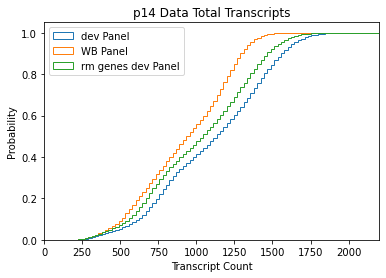

In [29]:
# Plot cell-wise total expression count for all genes in panel
bins = np.linspace(0,2200,100)

plt.hist(devDataDevPanelOld, bins, density = True, histtype='step', cumulative=True, linewidth = 1,label='dev Panel');
plt.hist(devDataAdultPanel, bins, density = True, histtype='step', cumulative=True, linewidth = 1,label='WB Panel');
plt.hist(devDataDevPanelNew, bins, density = True, histtype='step', cumulative=True, linewidth = 1,label='rm genes dev Panel');
plt.xlim([0,2200])
plt.xlabel('Transcript Count')
plt.ylabel('Probability')
plt.title('p14 Data Total Transcripts')
plt.legend(loc='upper left')

## Find highly expressed genes

In [51]:
# Create a table of average non-zero expression count per gene
x = devData[:,devDataDevPanelGenes].X.A
x[x == 0] = np.nan
y = 2 ** x
avgCount = np.nanmean(y,0)

In [57]:
pd.DataFrame({'Count': avgCount},index=devDataDevPanelGenes).sort_values('Count',ascending=False)

,Count
Nrxn1,12.155645
Cadm2,11.760461
Ptprd,11.409051
Erbb4,10.723239
Xist,10.557430
...,...
Sstr3,6.021938
Wnt2,5.977580
Gm30400,5.970374
Neurog2,5.927436


In [58]:
# Save table to csv
pd.DataFrame({'Count': avgCount},index=devDataDevPanelGenes).sort_values('Count',ascending=False).to_csv("../Data/Transcript Counts.csv")

## Look at accuracy of final panel

In [55]:
# Load panel from excel sheet
panelDF = pd.read_excel('../Data/p14_panel_submitted.xlsx',usecols=[1])
#  Fix excel date conversions
panelDF["gene"][292] = "March1"
panelDF["gene"][293] = "Sept9"

# Convert to list
finalPanel = list(panelDF["gene"])

# Clean inputs such that panel is compatible with dataset
rmGenes = set(finalPanel) - set(devData.var_names)
finalPanel = list(set(finalPanel) - rmGenes)
# adultDataDevPanelGenes = list(set(p14Panel['346'] + ziPanel['60'] + addPanel) - rmGenes)

In [57]:
rmGenes

{'Emrn', 'Tsh22'}

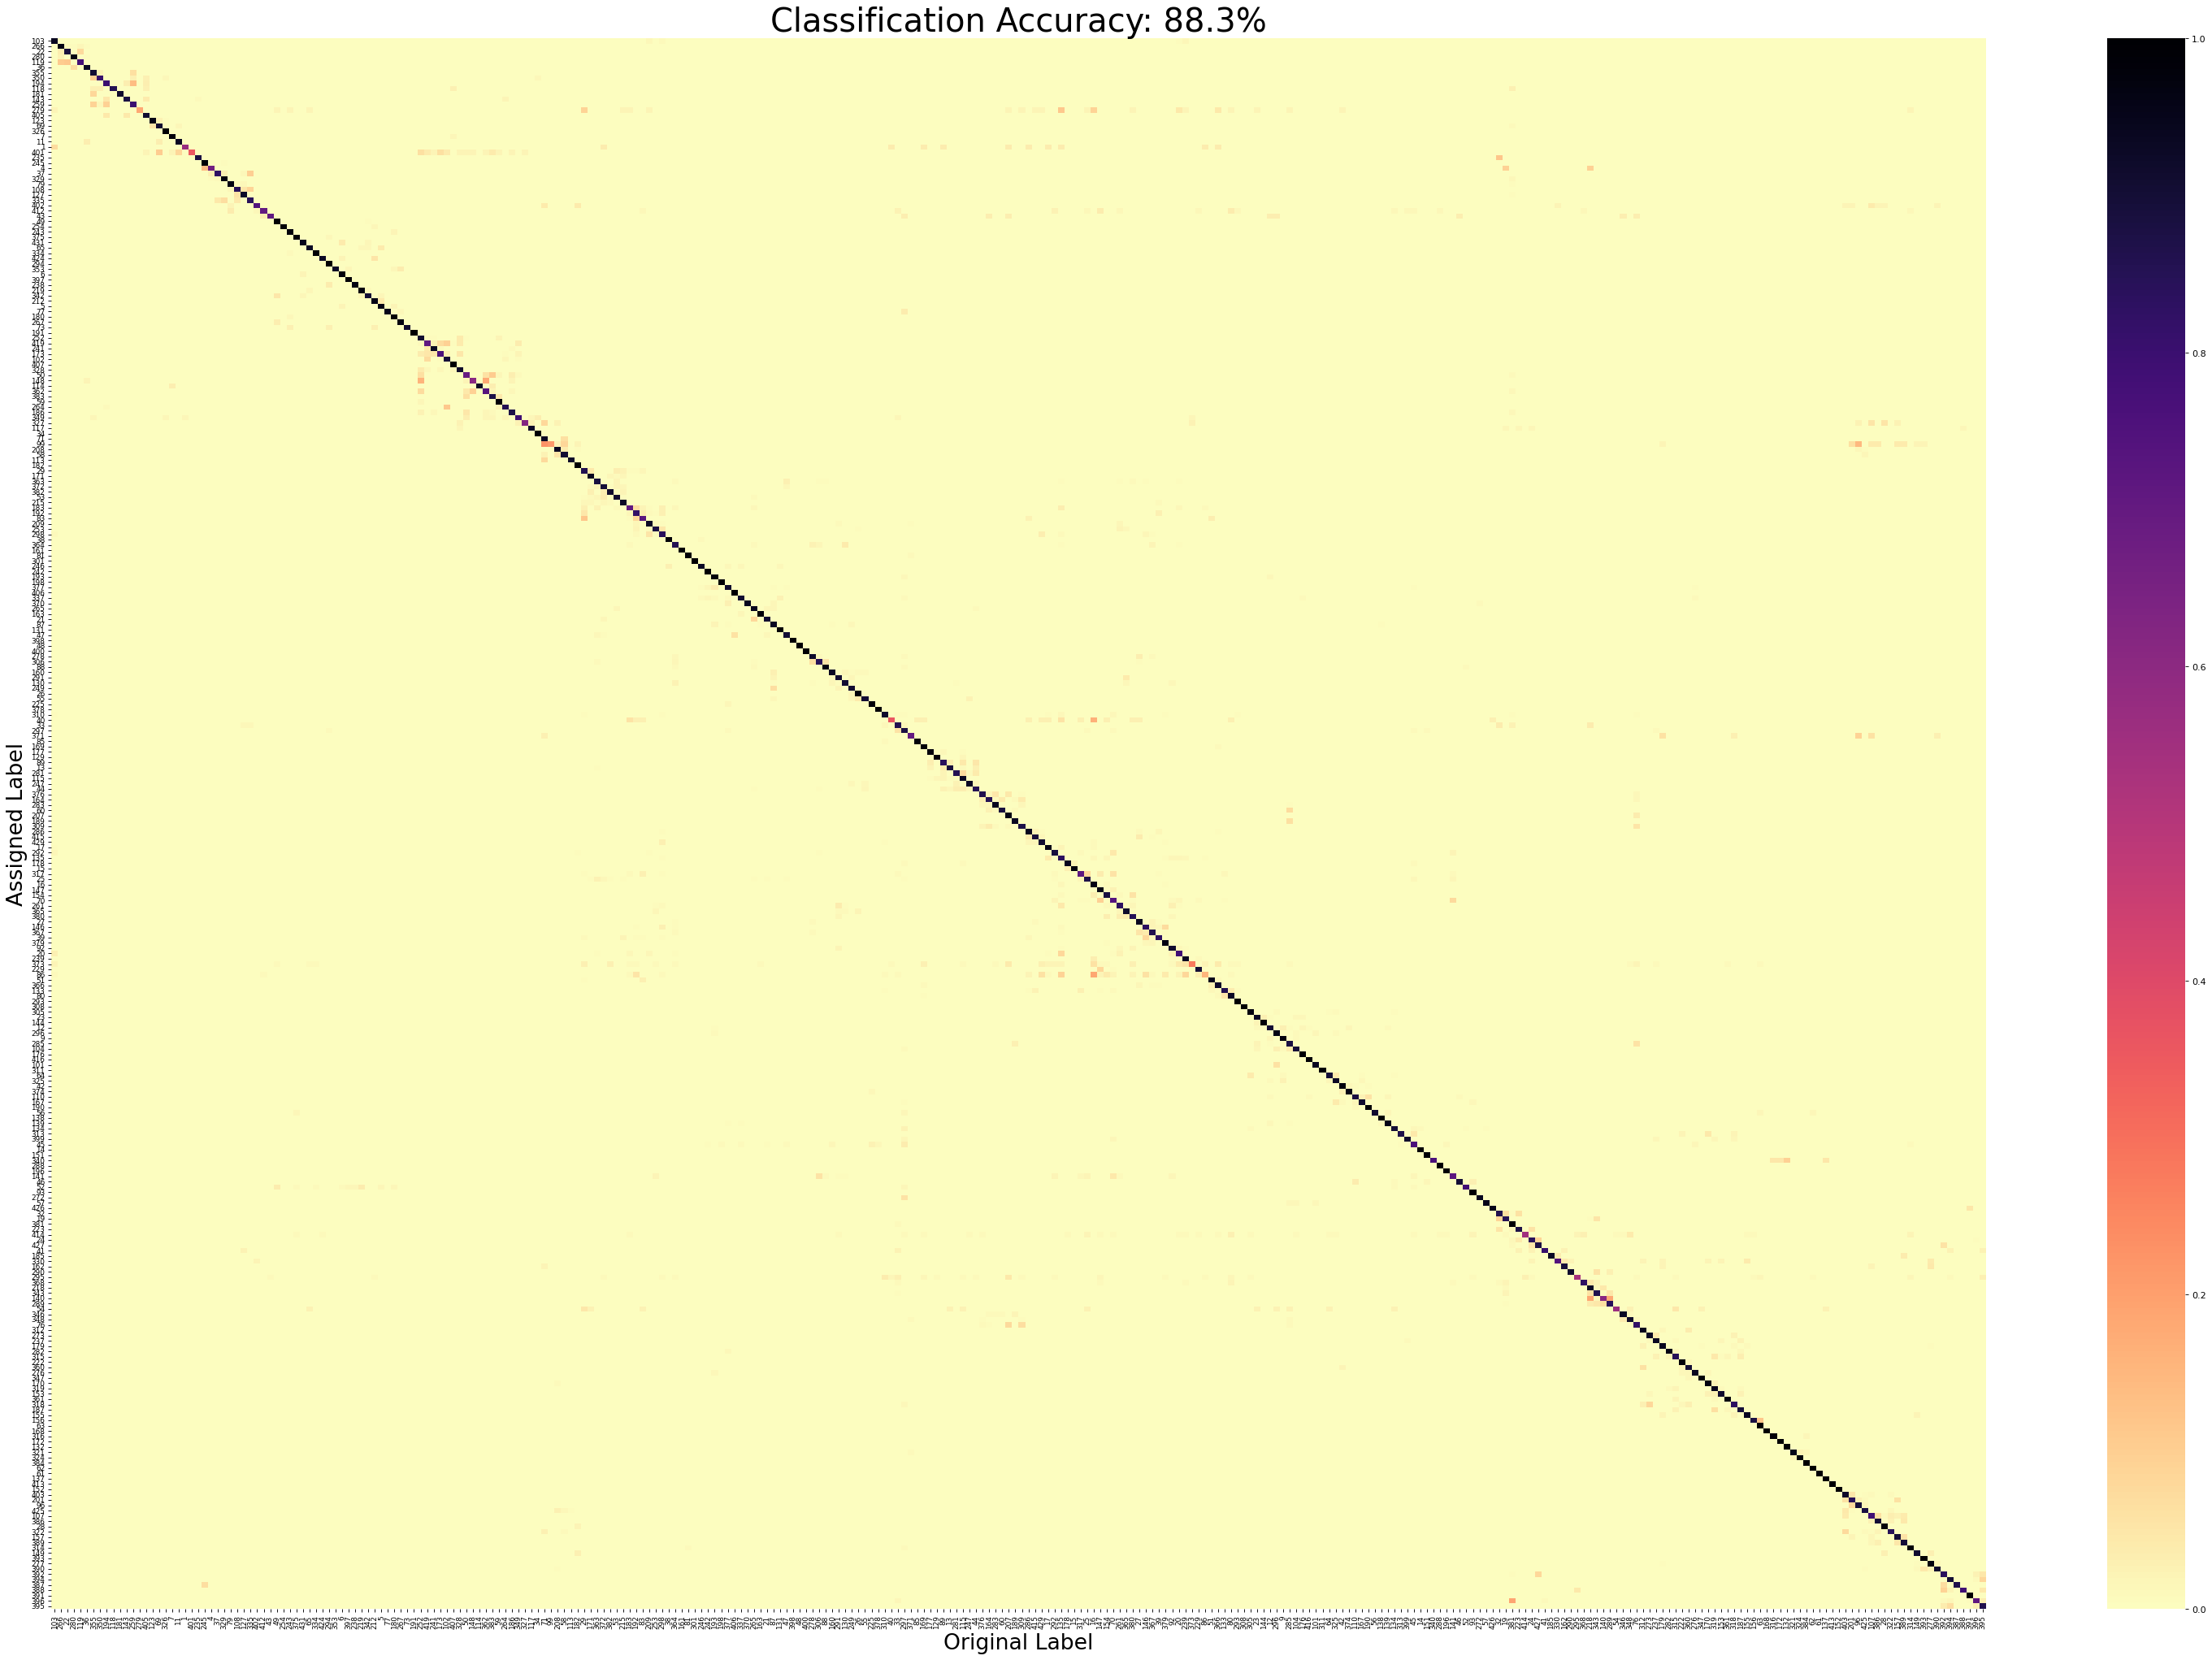

In [56]:
evalPanel(devData,finalPanel,devData.obs["cl"]);